In [1]:
import wikipedia
import requests
import json
from PIL import Image

In [2]:
WIKI_REQUEST = 'http://en.wikipedia.org/w/api.php?action=query&prop=pageimages&format=json&piprop=original&titles='

In [3]:
url='https://en.wikipedia.org/w/api.php'

In [4]:
def get_wiki_image(search_term):
    try:
        result = wikipedia.search(search_term, results = 1)
        wikipedia.set_lang('en')
        wkpage = wikipedia.WikipediaPage(title = result[0])
        title = wkpage.title
        response  = requests.get(WIKI_REQUEST+title)
        json_data = json.loads(response.text)
        img_link = list(json_data['query']['pages'].values())[0]['original']['source']
        return img_link
    except:
        return 0

In [5]:
get_wiki_image("Amanita muscaria")

'https://upload.wikimedia.org/wikipedia/commons/3/32/Amanita_muscaria_3_vliegenzwammen_op_rij.jpg'

In [8]:
def Wiki_Api(mushroom_name):
    mushroom_dict = {}
    params={
    'action':'query',
    'format':'json',
    'titles':mushroom_name,
    'prop':'revisions',
    'rvsection':0,
    'rvprop':'content'}
    #Inital response from Wiki web page
    response=requests.get(url,params).json()
    #Find key for Json
    key = list(response['query']['pages'].keys())[0]
    lines = response['query']['pages'][key]['revisions'][0]['*'].split('\n')
    cap_counter  =0
    for line in lines:
        if 'howEdible' in line:
            mushroom_dict["howEdible"] = line.split('=')[1].strip(" ").strip("}")
        if 'whichGills' in line:
            mushroom_dict["whichGills"] = line.split('=')[1].strip(" ")
        if 'capShape' in line and cap_counter==0:
            mushroom_dict["capShape"] = line.split('=')[1].strip(" ")
            cap_counter += 1

    return (mushroom_dict)

In [28]:
def pic_to_dict(dic_item):
    folder_loc = "Wiki_images" #where we will retrieve the files from
    full_loc = f"Wiki_images/{dic_item}.jpeg"
    im = Image.open(full_loc)
    size = 126,126
    im.thumbnail(size)
    return full_loc

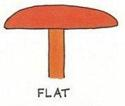

In [32]:
pic_to_dict(Wiki_Api(preidction)["capShape"])
Image.open(pic_to_dict(Wiki_Api(preidction)["capShape"]))

In [23]:
preidction="Amanita muscaria"

In [33]:
try:
    if not Wiki_Api(preidction)["capShape"]:
        print('The api call did not work')
        pass
    else:
        print('The Wiki_Api call worked')
        expander_info = expander_cols[0].expander("Cap Shape:")
        print('The Wiki_Api call worked')
        im3= Image.open(pic_to_dict(Wiki_Api(preidction)["capShape"]))
        im3.thumbnail(size)
        print('The Wiki_Api call worked')
        expander_info.image(im3)
        expander_hydro = expander_cols[1].expander("Hymenium Shape:")
        im4= Image.open(pic_to_dict(Wiki_Api(preidction)["whichGills"]))
        im4.thumbnail(size)
        expander_hydro.image(im4)
        expander_ed = expander_cols[2].expander("Edible:")
        im5= Image.open(pic_to_dict(Wiki_Api(preidction)["howEdible"]))
        im5.thumbnail(size)
        expander_ed.image(im5)
        expander_interesting = st.expander('interesing info')
        expander_interesting.write('''A. muscaria was used by both shamans and laypeople alike, and was used recreationally as well as religiously. In eastern Siberia,
                                      the shaman would take the mushrooms, and others would drink his urine. This urine, still containing psychoactive elements,
                                      may be more potent than the A. muscaria mushrooms with fewer
                                      negative effects such as sweating and twitching, suggesting that the initial user may act as a screening
                                      filter for other components in the mushroom.''')
except:
    print('There was an error in the call')
    pass

The Wiki_Api call worked
The Wiki_Api call worked
There was an error in the call


In [14]:
Wiki_Api("Amanita muscaria")["capShape"]

'flat'